In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv('spam.csv')

In [78]:
df.head()

,isuid,id,day of week,time of day,size.kb,box,domain,local,digits,name,...,special,credit,sucker,porn,chain,username,large text,spampct,category,spam
0,1,1,Thu,0,7,no,com,no,0,name,...,1,no,no,no,no,no,no,NaN,news,no
1,1,2,Thu,0,2,no,com,no,0,name,...,5,no,no,no,no,no,no,NaN,com,yes
2,1,3,Thu,14,3,no,edu,yes,0,name,...,2,no,no,no,yes,no,no,13.0,list,no
3,1,4,Thu,3,3,yes,de,no,0,name,...,0,no,no,no,no,no,no,NaN,ord,no
4,1,5,Thu,3,4,no,uk,no,0,name,...,2,no,no,no,no,no,no,NaN,list,no


In [79]:
df.columns

Index(['isuid', 'id', 'day of week', 'time of day', 'size.kb', 'box', 'domain',
       'local', 'digits', 'name', 'cappct', 'special', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text', 'spampct', 'category',
       'spam'],
      dtype='object')

In [80]:
df.dtypes

isuid            int64
id               int64
day of week     object
time of day      int64
size.kb          int64
box             object
domain          object
local           object
digits           int64
name            object
cappct         float64
special          int64
credit          object
sucker          object
porn            object
chain           object
username        object
large text      object
spampct        float64
category        object
spam            object
dtype: object

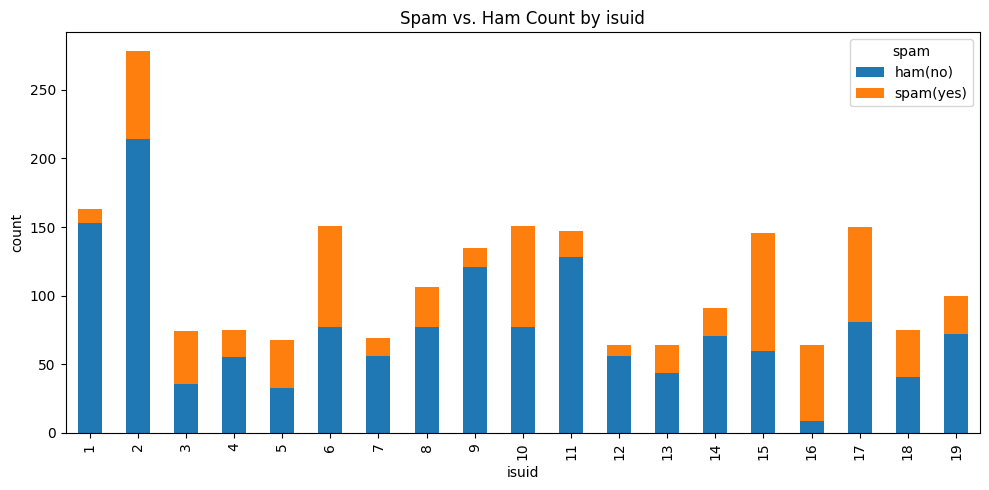

In [81]:
counts = df.groupby(['isuid','spam']).size().unstack(fill_value=0).sort_index()

if 1 in counts.columns:
    counts = counts.rename(columns={0:'ham(0)', 1:'spam(1)'})
elif 'yes' in counts.columns:
    counts = counts.rename(columns={'no':'ham(no)', 'yes':'spam(yes)'})

plt.figure(figsize=(10,5))
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('isuid')
plt.ylabel('count')
plt.title('Spam vs. Ham Count by isuid')
plt.tight_layout()
plt.show()

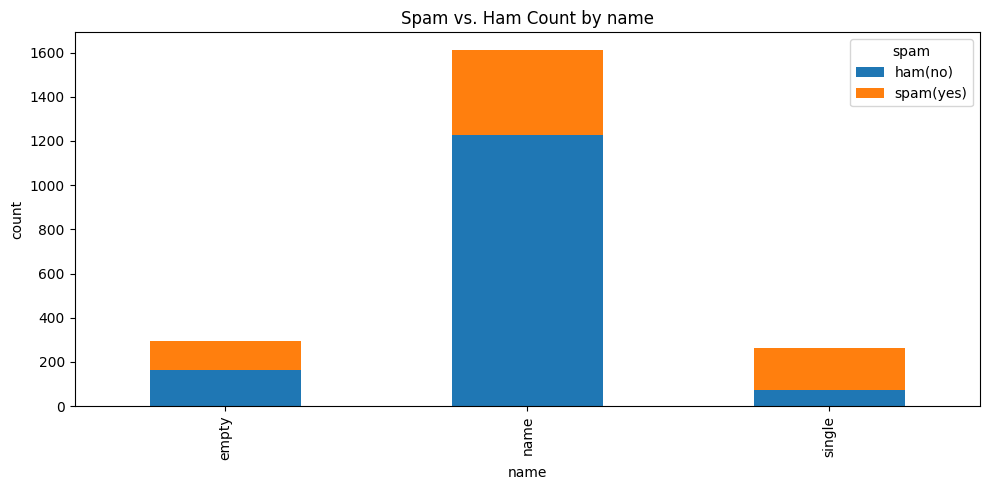

In [82]:
counts = df.groupby(['name','spam']).size().unstack(fill_value=0).sort_index()

if 1 in counts.columns:
    counts = counts.rename(columns={0:'ham(0)', 1:'spam(1)'})
elif 'yes' in counts.columns:
    counts = counts.rename(columns={'no':'ham(no)', 'yes':'spam(yes)'})

plt.figure(figsize=(10,5))
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('name')
plt.ylabel('count')
plt.title('Spam vs. Ham Count by name')
plt.tight_layout()
plt.show()

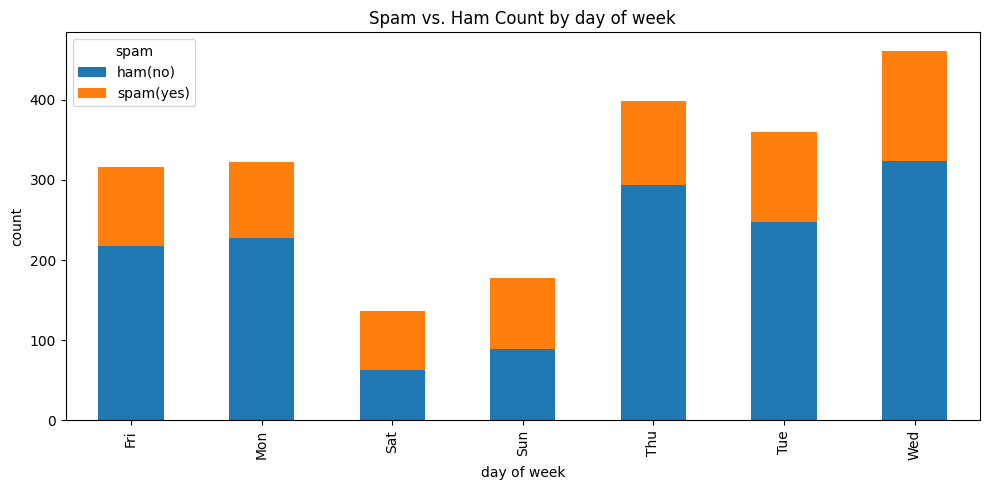

In [83]:
counts = df.groupby(['day of week','spam']).size().unstack(fill_value=0).sort_index()

if 1 in counts.columns:
    counts = counts.rename(columns={0:'ham(0)', 1:'spam(1)'})
elif 'yes' in counts.columns:
    counts = counts.rename(columns={'no':'ham(no)', 'yes':'spam(yes)'})
    
plt.figure(figsize=(10,5))
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('day of week')
plt.ylabel('count')
plt.title('Spam vs. Ham Count by day of week')
plt.tight_layout()
plt.show()

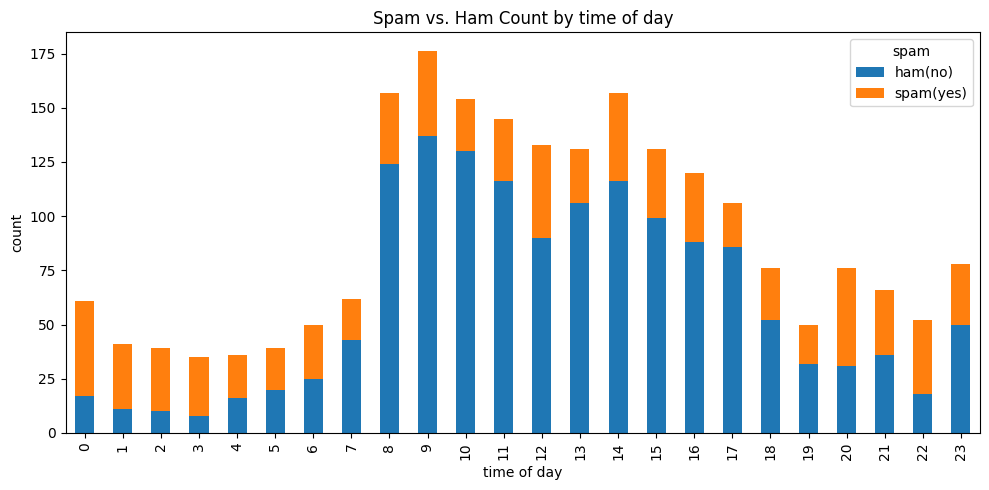

In [84]:
counts = df.groupby(['time of day','spam']).size().unstack(fill_value=0).sort_index()

if 1 in counts.columns:
    counts = counts.rename(columns={0:'ham(0)', 1:'spam(1)'})
elif 'yes' in counts.columns:
    counts = counts.rename(columns={'no':'ham(no)', 'yes':'spam(yes)'})

plt.figure(figsize=(10,5))
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('time of day')
plt.ylabel('count')
plt.title('Spam vs. Ham Count by time of day')
plt.tight_layout()
plt.show()

<Axes: ylabel='size.kb'>

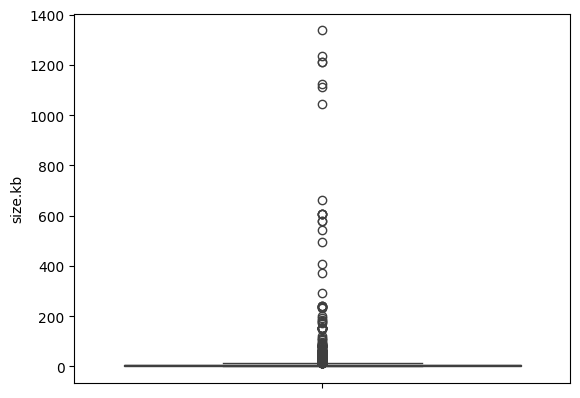

In [85]:
sns.boxplot(df['size.kb'])

In [86]:
df['size.kb'].describe()
df['size'] = 0
df.loc[df['size.kb'] < 4, 'size'] = 1
df.groupby('size')['spam'].value_counts(normalize=True).unstack()

spam,no,yes
size,,
0,0.537625,0.462375
1,0.812734,0.187266


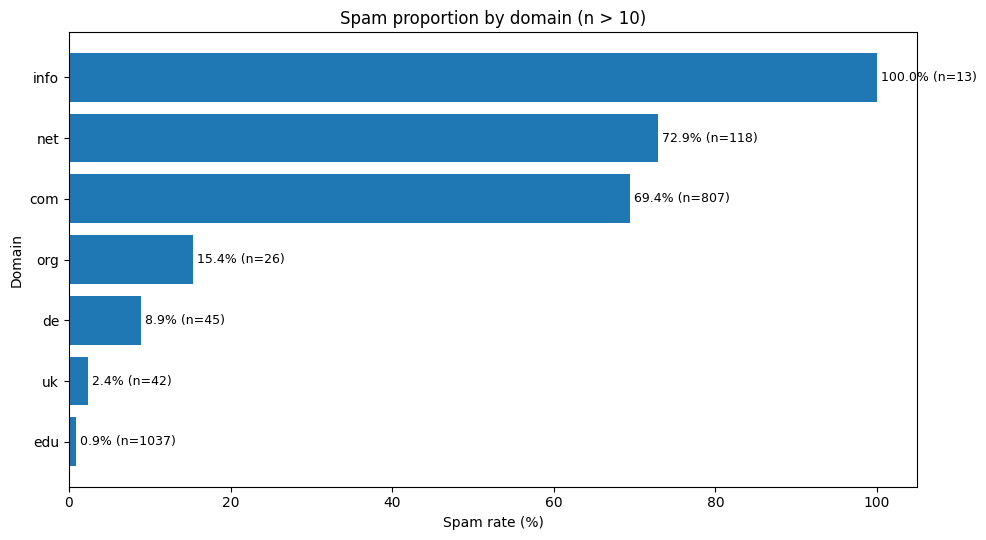

In [87]:
df['spam_num'] = df['spam'].astype(str).str.lower().map({'yes': 1, 'no': 0})

tmp = df[['domain', 'spam_num']].dropna()
tmp['domain'] = tmp['domain'].astype(str).str.lower().str.strip()

summary = (tmp.groupby('domain', as_index=False)
           .agg(n=('spam_num', 'size'),
                spam_rate=('spam_num', 'mean')))

summary = summary[summary['n'] > 10].copy()
summary['spam_rate_pct'] = summary['spam_rate'] * 100

plot_df = summary.sort_values('spam_rate', ascending=True)
plt.figure(figsize=(10, 0.5*len(plot_df) + 2))
plt.barh(plot_df['domain'], plot_df['spam_rate_pct'])

for i, (rate, n) in enumerate(zip(plot_df['spam_rate_pct'], plot_df['n'])):
    plt.text(rate + 0.5, i, f"{rate:.1f}% (n={n})", va='center', fontsize=9)

plt.xlabel('Spam rate (%)')
plt.ylabel('Domain')
plt.title('Spam proportion by domain (n > 10)')
plt.tight_layout()
plt.show()

/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/2659652469.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = sub.groupby('cappct_bin')['spam_num'].mean()*100


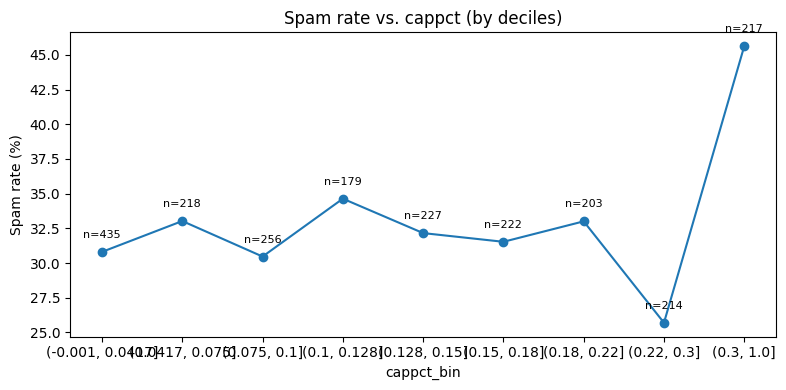

In [88]:
df = df.copy()
df['spam_num'] = df['spam'].astype(str).str.lower().map({'yes':1, 'no':0})
sub = df[['cappct','spam','spam_num']].dropna()

sub['cappct_bin'] = pd.qcut(sub['cappct'], q=10, duplicates='drop')
rate = sub.groupby('cappct_bin')['spam_num'].mean()*100
n_in_bin = sub['cappct_bin'].value_counts().reindex(rate.index)
plt.figure(figsize=(8,4))
rate.plot(marker='o')
for i, (r, n) in enumerate(zip(rate.values, n_in_bin.values)):
    plt.text(i, r+1, f'n={n}', ha='center', fontsize=8)
plt.ylabel('Spam rate (%)')
plt.title('Spam rate vs. cappct (by deciles)')
plt.tight_layout()
plt.show()

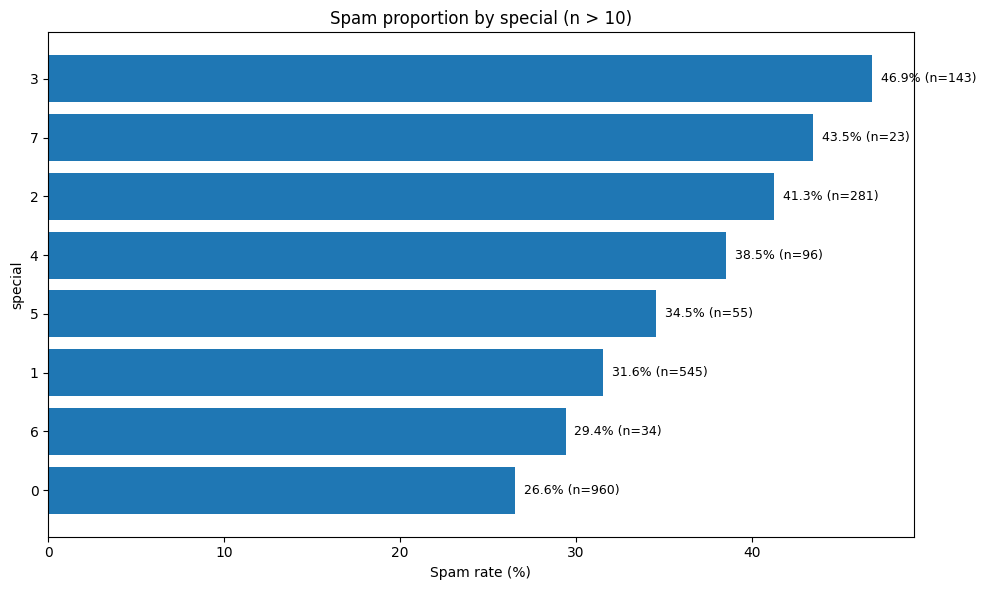

In [89]:
df['spam_num'] = df['spam'].astype(str).str.lower().map({'yes': 1, 'no': 0})

tmp = df[['special', 'spam_num']].dropna()
tmp['special'] = tmp['special'].astype(str).str.lower().str.strip()

summary = (tmp.groupby('special', as_index=False)
           .agg(n=('spam_num', 'size'),
                spam_rate=('spam_num', 'mean')))

summary = summary[summary['n'] > 10].copy()
summary['spam_rate_pct'] = summary['spam_rate'] * 100

plot_df = summary.sort_values('spam_rate', ascending=True)
plt.figure(figsize=(10, 0.5*len(plot_df) + 2))
plt.barh(plot_df['special'], plot_df['spam_rate_pct'])

for i, (rate, n) in enumerate(zip(plot_df['spam_rate_pct'], plot_df['n'])):
    plt.text(rate + 0.5, i, f"{rate:.1f}% (n={n})", va='center', fontsize=9)

plt.xlabel('Spam rate (%)')
plt.ylabel('special')
plt.title('Spam proportion by special (n > 10)')
plt.tight_layout()
plt.show()

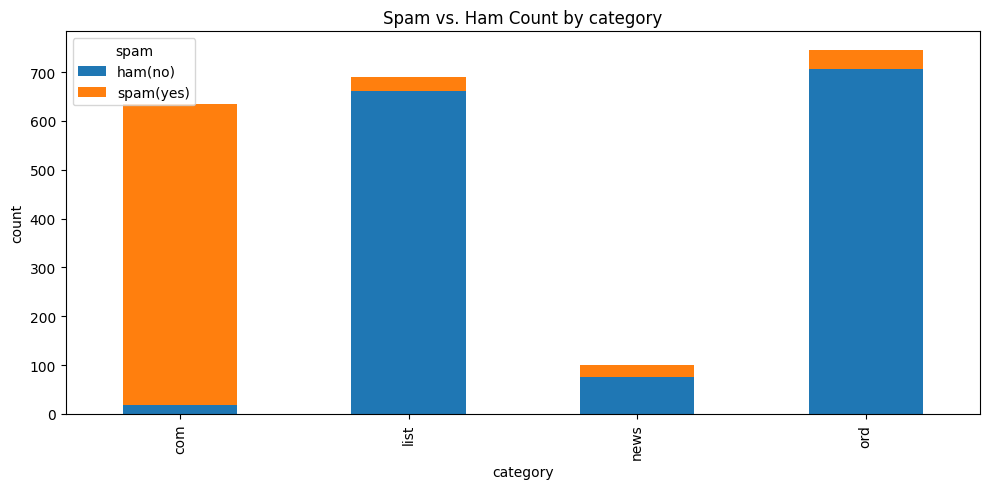

In [90]:
counts = df.groupby(['category','spam']).size().unstack(fill_value=0).sort_index()

if 1 in counts.columns:
    counts = counts.rename(columns={0:'ham(0)', 1:'spam(1)'})
elif 'yes' in counts.columns:
    counts = counts.rename(columns={'no':'ham(no)', 'yes':'spam(yes)'})

plt.figure(figsize=(10,5))
counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('category')
plt.ylabel('count')
plt.title('Spam vs. Ham Count by category')
plt.tight_layout()
plt.show()

In [91]:
df.describe()

,isuid,id,time of day,size.kb,digits,cappct,special,spampct,size,spam_num
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,818.000000,2171.000000,2171.000000
mean,9.234454,201.187471,12.260709,16.489636,0.590972,0.158434,1.397052,44.634474,0.491939,0.327038
std,5.678956,640.335487,5.651004,80.557683,2.528618,0.168419,2.323566,34.155733,0.500050,0.469239
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,33.000000,9.000000,2.000000,0.000000,0.060000,0.000000,11.000000,0.000000,0.000000
50%,9.000000,62.000000,12.000000,4.000000,0.000000,0.128000,1.000000,47.500000,0.000000,0.000000
75%,14.000000,108.000000,16.000000,7.000000,0.000000,0.200000,2.000000,76.000000,1.000000,1.000000
max,19.000000,3470.000000,23.000000,1337.000000,23.000000,1.000000,35.000000,99.000000,1.000000,1.000000


In [92]:
df['is_weekend'] = df['day of week'].isin(['Sat', 'Sun']).astype(int)
#df = df.drop(columns = ['day of week'])
df['is_late'] = 0
df.loc[(df['time of day'] > 22) | (df['time of day'] < 6), 'is_late'] = 1
#df = df.drop(columns = ['time of day'])
#df = df.drop(columns = ['size.kb'])

In [93]:
yes_no_pattern = {'yes', 'no'}
def is_yes_no_column(column):
    unique_vals = set(column.dropna().astype(str).str.lower().unique())
    return unique_vals.issubset(yes_no_pattern)
candidate_columns = df.select_dtypes(include=['object']).columns
yes_no_columns = [col for col in candidate_columns if is_yes_no_column(df[col])]

mapping = {
    'yes': 1,'no': 0
}

df[yes_no_columns] = df[yes_no_columns].replace(mapping)

/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/2261262003.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace(mapping)


In [94]:
df.isnull().sum()

isuid             0
id                0
day of week       0
time of day       0
size.kb           0
box               0
domain            0
local             0
digits            0
name              0
cappct            0
special           0
credit            0
sucker            0
porn              0
chain             0
username          0
large text        0
spampct        1353
category          0
spam              0
size              0
spam_num          0
is_weekend        0
is_late           0
dtype: int64

In [95]:
last = df['spam']
df = df.drop(columns = ['spam'])
df['spam'] = last

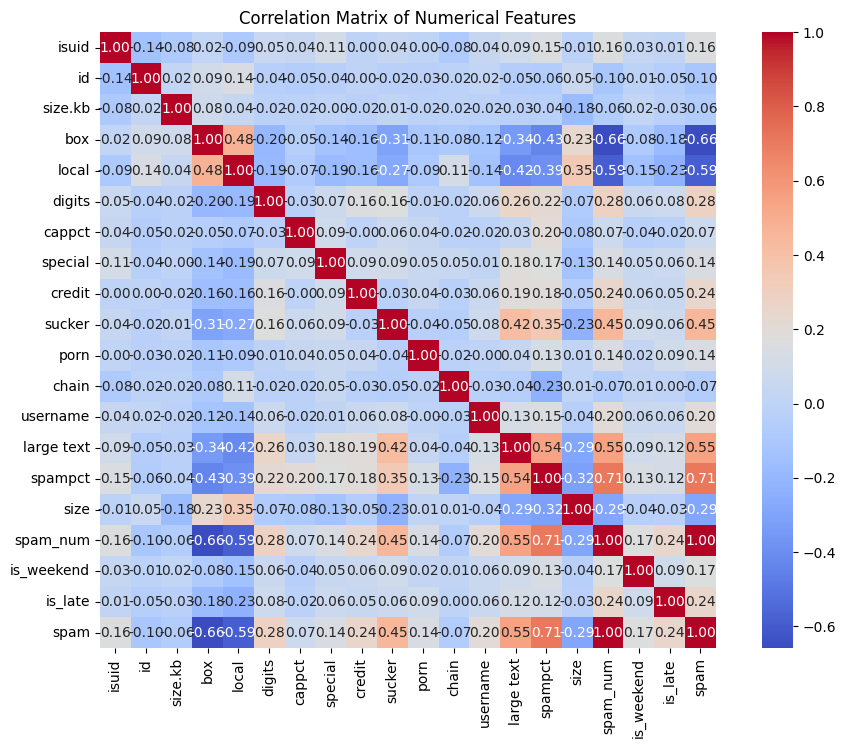

In [96]:
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop('time of day')
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()  

In [97]:
select = [column for column in num_cols if column != 'spam' and abs(corr_matrix['spam'][column]) > 0.2]
select

['box',
 'local',
 'digits',
 'credit',
 'sucker',
 'username',
 'large text',
 'spampct',
 'size',
 'spam_num',
 'is_late']

In [98]:
plt.figure(figsize=(8, max(4, 0.25*len(yes_no_columns))))
sns.barplot(
    data=yes_no_columnssummary.reset_index(names='feature'),
    x='pct_yes', y='feature'
)
plt.xlabel('% of YES (value==1)')
plt.ylabel('Binary feature')
plt.title('Proportion of YES for each binary (yes/no) feature')
plt.tight_layout()
plt.show()

NameError: name 'yes_no_columnssummary' is not defined

<Figure size 800x400 with 0 Axes>

spam,0,1
box,73.853525,3.661972
local,64.134155,1.830986
large text,3.969884,50.000000
chain,3.422313,1.126761
username,1.368925,10.000000
sucker,0.752909,30.281690
credit,0.752909,11.126761
porn,0.136893,3.521127
spam,0.000000,100.000000


<Figure size 1000x400 with 0 Axes>

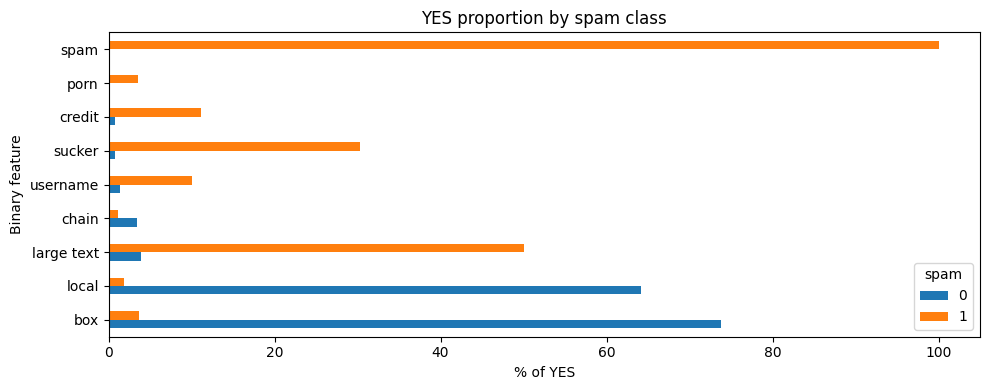

In [ ]:
target = 'spam'
if df[target].dropna().isin([0,1]).all():
    prop_by_spam = df.groupby(target)[yes_no_columns].mean().T * 100
    prop_by_spam = prop_by_spam.sort_values(by=prop_by_spam.columns.tolist(), ascending=False)
    display(prop_by_spam)

    plt.figure(figsize=(10, max(4, 0.3*len(yes_no_columns))))
    prop_by_spam.plot(kind='barh', figsize=(10, max(4, 0.3*len(yes_no_columns))))
    plt.xlabel('% of YES')
    plt.ylabel('Binary feature')
    plt.title('YES proportion by spam class')
    plt.tight_layout()
    plt.show()


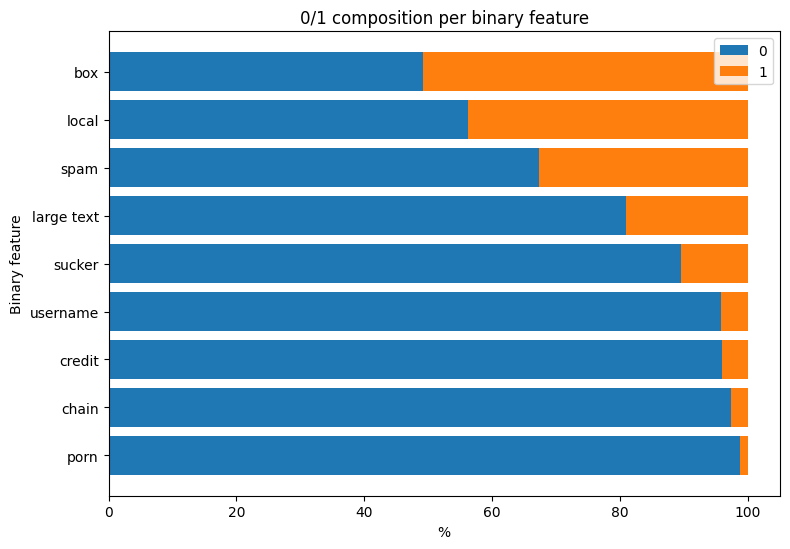

In [ ]:
pct1 = (df[yes_no_columns].mean().sort_values(ascending=True) * 100)
pct0 = 100 - pct1

plt.figure(figsize=(8, 0.4*len(pct1)+2))
plt.barh(pct1.index, pct0, label='0')
plt.barh(pct1.index, pct1, left=pct0, label='1')
plt.xlabel('%')
plt.ylabel('Binary feature')
plt.title('0/1 composition per binary feature')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['spampct'].isnull().sum()

np.int64(1353)

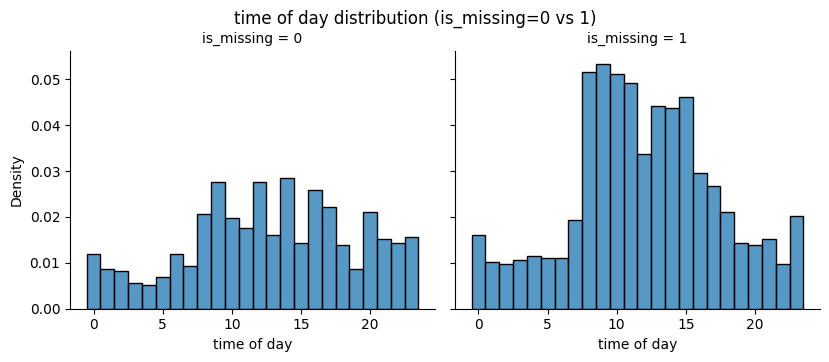

In [ ]:
bins = np.arange(-0.5, 24.5, 1)
sub = df[['time of day', 'is_missing']].dropna()
df['is_missing']=df['spampct'].isnull().astype(int)
sns.displot(
    data=sub, x='time of day', col='is_missing',
    kind='hist', bins=bins, stat='density', common_bins=True,
    height=3.5, aspect=1.2
)
plt.suptitle('time of day distribution (is_missing=0 vs 1)', y=1.02)
plt.show()

<Axes: xlabel='time of day', ylabel='spampct'>

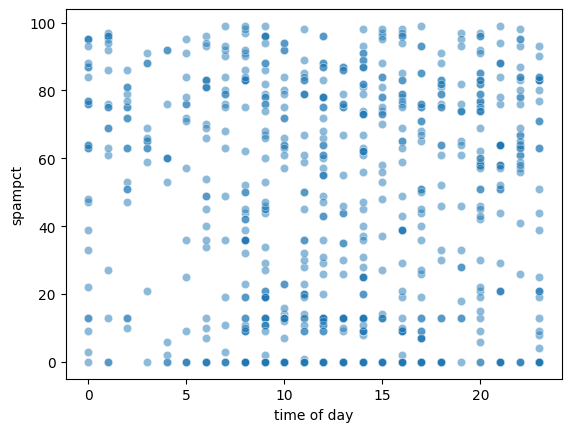

In [ ]:
sns.scatterplot(data=df, x='time of day', y='spampct',alpha=0.5)

In [ ]:
n_unique = df[['time of day','spampct']].dropna().drop_duplicates().shape[0]
print(n_unique)

465


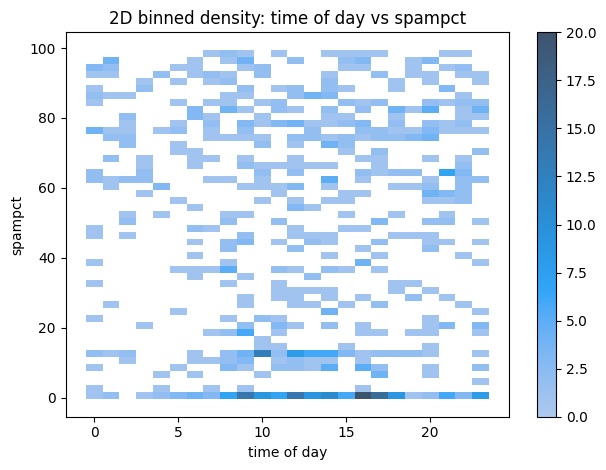

In [ ]:
bins_x = np.arange(-0.5, 24.5, 1)     # time of day: 0–23
bins_y = np.arange(-0.5, 100.5, 2)    # spampct: 0–100

sns.histplot(
    data=df,
    x='time of day', y='spampct',
    bins=[bins_x, bins_y],
    cbar=True
)
plt.title('2D binned density: time of day vs spampct')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [ ]:
y_column ='spam'
x_column = df.columns.drop(['spampct','spam','day of week','time of day','size.kb','spam_num','isuid','id'])

In [ ]:
dnaive = df[x_column]
dnaive.columns

category
ord     746
list    690
com     635
news    100
Name: count, dtype: int64

In [ ]:
dnaive['tld'] = dnaive['domain'].astype(str).str.lower().str.split('.').str[-1]
TOP_TLDS = ['edu','com','net']               
dnaive['tld_slim'] = np.where(dnaive['tld'].isin(TOP_TLDS), dnaive['tld'], 'other')

/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/211701786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnaive['tld'] = dnaive['domain'].astype(str).str.lower().str.split('.').str[-1]
/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/211701786.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnaive['tld_slim'] = np.where(dnaive['tld'].isin(TOP_TLDS), dnaive['tld'], 'other')


In [ ]:
dnaive.drop(columns = ['tld','domain'], inplace=True)
dnaive.head()

/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/1873898207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dnaive.drop(columns = ['tld','domain'], inplace=True)


,box,local,digits,name,cappct,special,credit,sucker,porn,chain,username,large text,category,size,is_weekend,is_late,tld_slim
0,0,0,0,name,0.193548,1,0,0,0,0,0,0,news,0,0,1,com
1,0,0,0,name,0.191489,5,0,0,0,0,0,0,com,1,0,1,com
2,0,1,0,name,0.074074,2,0,0,0,1,0,0,list,1,0,0,edu
3,1,0,0,name,0.200000,0,0,0,0,0,0,0,ord,1,0,1,other
4,0,0,0,name,0.434783,2,0,0,0,0,0,0,list,0,0,1,other


In [ ]:
X = dnaive.copy()
y = df['spam'].astype(int)

In [ ]:
num_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

In [ ]:
cat_name   = ['name']         
cat_cat    = ['category']        
cat_tld    = ['tld_slim']        

oh_name = OneHotEncoder(
    categories=[['name','single','empty']],
    drop='first', handle_unknown='ignore', sparse_output=False
)
oh_cat  = OneHotEncoder(
    categories=[['com','list','news','ord']],
    drop='first', handle_unknown='ignore', sparse_output=False
)
oh_tld  = OneHotEncoder(
    categories=[TOP_TLDS + ['other']],
    drop='first', handle_unknown='ignore', sparse_output=False
)

pre = ColumnTransformer([
    ('name_oh', oh_name, ['name']),
    ('cat_oh',  oh_cat,  ['category']),
    ('tld_oh',  oh_tld,  ['tld_slim']),
    ('num',     'passthrough', num_cols),
], remainder='drop')

In [ ]:
clf = Pipeline([
    ('pre', pre),
    ('nb', GaussianNB())
])
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf.fit(X_tr, y_tr)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('name_oh',
                                                  OneHotEncoder(categories=[['name',
                                                                             'single',
                                                                             'empty']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['name']),
                                                 ('cat_oh',
                                                  OneHotEncoder(categories=[['com',
                                                                             'list',
                                                                             'news',
                                                                             'ord']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['category']),
                                                 ('tld_oh',
                                                  OneHotEncoder(categories=[['edu',
                                                                             'com',
                                                                             'net',
                                                                             'other']],
                                                                drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['tld_slim']),
                                                 ('num', 'passthrough',
                                                  ['box', 'local', 'digits',
                                                   'cappct', 'special',
                                                   'credit', 'sucker', 'porn',
                                                   'chain', 'username',
                                                   'large text', 'size',
                                                   'is_weekend',
                                                   'is_late'])])),
                ('nb', GaussianNB())])

In [103]:
y_pred = clf.predict(X_te)
confusion_matrix(y_te,y_pred)

array([[274,  19],
       [ 19, 123]])

In [104]:
classification_report(y_te,y_pred, digits=4)

'              precision    recall  f1-score   support\n\n           0     0.9352    0.9352    0.9352       293\n           1     0.8662    0.8662    0.8662       142\n\n    accuracy                         0.9126       435\n   macro avg     0.9007    0.9007    0.9007       435\nweighted avg     0.9126    0.9126    0.9126       435\n'

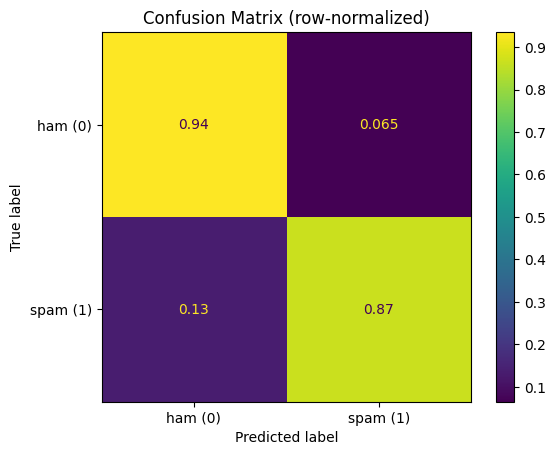

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(
    y_te, y_pred, display_labels=['ham (0)','spam (1)'], normalize='true'
)
plt.title('Confusion Matrix (row-normalized)')
plt.show()

In [ ]:
proba = clf.predict_proba(X_te)[:,1]
auc = roc_auc_score(y_te, proba)
print("Test ROC-AUC:", auc)

rng = np.random.default_rng(0); idx = np.arange(len(y_te)); boots=[]
for _ in range(2000):
    s = rng.choice(idx, size=len(idx), replace=True)
    boots.append(roc_auc_score(y_te.iloc[s], proba[s]))
lo, hi = np.percentile(boots, [2.5, 97.5])
print(f"95% CI: [{lo:.3f}, {hi:.3f}]")

Test ROC-AUC: 0.9536004422439072
95% CI: [0.926, 0.977]


   run    E_test  accuracy
0    0  0.105747  0.894253
1    1  0.096552  0.903448
2    2  0.071264  0.928736
3    3  0.080460  0.919540
4    4  0.101149  0.898851
5    5  0.080460  0.919540
6    6  0.112644  0.887356
7    7  0.064368  0.935632
8    8  0.089655  0.910345
9    9  0.089655  0.910345

E_test mean = 0.089, std = 0.015, 95% CI = [0.080, 0.099]


/var/folders/6d/nn3gll_n7f13x_pt18_lrtfc0000gn/T/ipykernel_5512/1805737678.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(res['E_test'], vert=True, labels=['E_test'])


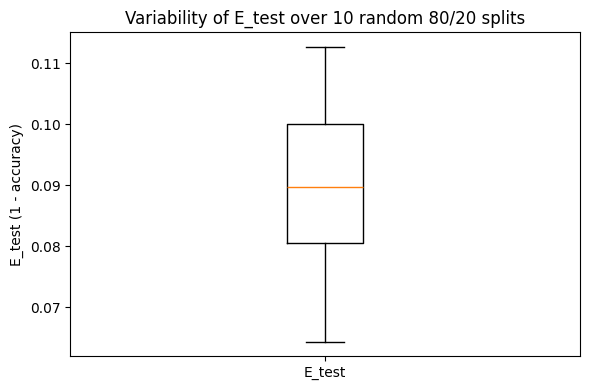

In [109]:
from sklearn.metrics import accuracy_score
results = []
seeds = range(10)
for seed in seeds:
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=seed
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_te)
    acc = accuracy_score(y_te, y_pred)
    etest = 1.0 - acc
    results.append({'run': seed, 'E_test': etest, 'accuracy': acc})

res = pd.DataFrame(results)
print(res)

# 统计量
m = res['E_test'].mean()
s = res['E_test'].std(ddof=1)
ci_lo = m - 1.96 * s / np.sqrt(len(res))
ci_hi = m + 1.96 * s / np.sqrt(len(res))
print(f"\nE_test mean = {m:.3f}, std = {s:.3f}, 95% CI = [{ci_lo:.3f}, {ci_hi:.3f}]")

# 可视化
plt.figure(figsize=(6,4))
plt.boxplot(res['E_test'], vert=True, labels=['E_test'])
plt.title('Variability of E_test over 10 random 80/20 splits')
plt.ylabel('E_test (1 - accuracy)')
plt.tight_layout()
plt.show()

In [120]:
C_FP, C_FN = 10, 1         
tau = C_FP / (C_FP + C_FN)
print(f"Using cost-sensitive threshold tau = {tau:.3f}")

proba = clf.predict_proba(X_te)[:, 1]  
y_pred_cost = (proba >= tau).astype(int) 

cm = confusion_matrix(y_te, y_pred_cost, labels=[0,1])
cost = C_FP*cm[0,1] + C_FN*cm[1,0]
print("Confusion matrix (rows=true, cols=pred):\n", cm)
print(f"Total cost on test = {cost}")
print(classification_report(y_te, y_pred_cost, digits=3))
print("ROC-AUC (probability quality):", roc_auc_score(y_te, proba))

Using cost-sensitive threshold tau = 0.909
Confusion matrix (rows=true, cols=pred):
 [[276  17]
 [ 27 115]]
Total cost on test = 197
              precision    recall  f1-score   support

           0      0.911     0.942     0.926       293
           1      0.871     0.810     0.839       142

    accuracy                          0.899       435
   macro avg      0.891     0.876     0.883       435
weighted avg      0.898     0.899     0.898       435

ROC-AUC (probability quality): 0.9582992837571505


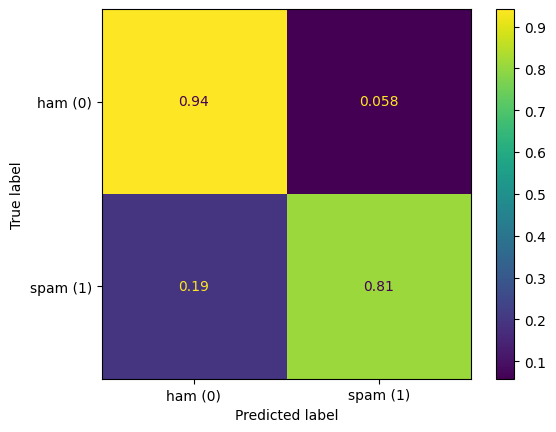

In [121]:
ConfusionMatrixDisplay.from_predictions(y_te, y_pred_cost, display_labels=['ham (0)','spam (1)'],normalize='true')
